# Data Analysis and Machine Learning FYS-STK3155/FYS4155 - Project 1 

### Franke function 


\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}


In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed 

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

In [2]:
X = np.arange(0, 1, 0.005)
Y = np.arange(0, 1, 0.005)

n = np.size(X, 0)

In [3]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [4]:
def FindData(x , y):    
    #Franke funksjonen trenger et to dimensjonalt nett av variabler, meshgrid: 
    x_d, y_d = np.meshgrid(x,y)
    z_d = FrankeFunction(x_d, y_d) 
    return x_d, y_d, z_d 

In [5]:
def convertData(x_d, y_d, z_d):
    #Strekker ut matrisene
    x = x_d.reshape(-1,1)  
    y = y_d.reshape(-1,1)
    z = z_d.reshape(-1,1)
    
    # returnerer også lengden (antall rader) til den nye utstrakte vektoren
    n = np.size(x, 0)
    
    return (x, y, z, n)

In [6]:
def plotSurface(x_d, y_d, z_d):
    # Kode for å plotte overflater, basert på oppgaveteksten 
    fig = plt.figure()
    ax = fig.gca(projection='3d')   
   
    surf = ax.plot_surface(x_d, y_d, z_d, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

In [7]:
def XY(x,y):
    # Oppretter designmatrisen/Vandermondes
    xyb = np.c_[np.ones((x.shape)), x, y, x**2, x*y, y**2, x**3, x**2*y, x*y**2, y**3, x**4, x**3*y, x**2*y**2, x*y**3,y**4,
           x**5, x**4*y, x**3*y**2, x**2*y**3, x*y**4, y**5]
    #print(xyb.shape)
    return xyb

In [8]:
def beta_model(model, xyb, z):
    if (model == 'Linear'): 
        # betaLinear: 
        betaLinear = np.linalg.inv(xyb.T.dot(xyb)).dot(xyb.T).dot(z) 
        return betaLinear
    elif (model == 'Ridge'):
        I = np.identity(np.size(xyb, 1)) 
        lambda_R = 0.5
        betaRidge = np.linalg.inv(xyb.T.dot(xyb) + lambda_R*(I)).dot(xyb.T).dot(z)
        return betaRidge 
    elif (model == 'Lasso'):
        #betaLasso = 
        return betaLasso

In [9]:
#trener modellen: 
def predict(xyb,beta,n):
    # Finner utregnet forventet model. 
    zpredict = xyb.dot(beta)
    
    # shapen til x og y må ha like mange punkter, bruker derfor x_d.shape = y_d.shape
    zpredict_mesh = zpredict.reshape(n,n)
    return zpredict, zpredict_mesh

### Oppretter testdata: 

In [10]:
def testData():
    Xnew = np.linspace(0, 1, 200 ).reshape(-1, 1)
    Ynew = np.linspace(0, 1, 200 ).reshape(-1, 1)
    
    n = np.size(Xnew, 0)
    
    X_new, Y_new, Z_new = FindData(Xnew,Ynew)
                    
    xnew = X_new.reshape(-1,1)
    ynew = Y_new.reshape(-1,1)
   
    #Finner ny designmatrise for testsettet 
    xyb_test = XY(xnew,ynew)   
    
    return xyb_test, n, X_new, Y_new, Z_new 

#### Statistical 

In [11]:
def mu(z,n):
    #gjennomsnittsverdien 
    z_mean = (1/n ) * np.sum(z)
    return z_mean

        
def var(z, z_mu,n):
    #Sample variance: 
    var_z = (1/n)* sum((z-z_mu)**2) 
    return var_z

        
def MSE(z, z_tilde, n):
    #Mean Squared Error: z = true value, z_tilde = forventet z utifra modell  
    MSE = (1/n)*(sum(z-z_tilde)**2)
    return MSE        
        
def R_2(z, z_tilde, z_mean, n):
    R_2 = 1- ((sum(z.reshape(-1,1)-z_tilde)**2)/(sum((z-z_mean)**2)))
    return R_2


def MSEk(z, z_tilde, n):
    MSE = (1/n)*(sum((z-z_tilde)**2))
    return MSE    

### Cross-Validation
#### K-fold 

In [12]:
def k_fold(x,y,z, k, model): 
    # Oppretter en matrise av x, y og z. Datasettet som skal crossvalideres
    data = np.concatenate((x, y, z), axis = 1) 

    n = np.size(data, 0) #rader
    m = np.size(data, 1) #kolonner

    # Shuffle dataset: 
    np.random.shuffle(data)

    mse = 0
    r2 = 0
    
    #splitter dataset i k like deler. Oppretter antall folder. Bruker array_split. Da blir k deler blir ikke eksakt like,
    #men tilnærmet like, stort datasett gir lite forskjell. 
    split_dataset = np.array_split(data,k) 
    #Definerer alle k gangene datasettet skal deles opp. 
    for i in range(0, k): 
        # resetter train før hver oppdeling av datasettet.  
        train = np.zeros((0,3))

        # j definerer selve splittdelene og man bestemmer her om del j er en trenings eller test del. 
        for j in range(0,k): 
            if j == i:
                test = split_dataset[j]
                continue
            train = np.concatenate((train, split_dataset[j]), axis = 0)
        print(train.shape)
        
        # TRENING: 
        # Når hele datasettet er gått igjennom en hel iterasjon så trener man på train settet 
        #1. Finner designmatrisen, xyb: 
        xyb_train = XY(train[:,0],train[:,1])
        
        #2. Finner beta av treningsettet med treningsettets designmatrise og treningsdelens z-verdier.  
        beta = beta_model(model, xyb_train, train[:,2]) 

        # TEST:
        # Designmatrisen opprettes for testsettet 
        xyb_test = XY(test[:,0],test[:,1])
        
        nr =  np.size(test[:,2],0)

        # Finner forventet z_verdier for testsettet ved å bruke utregnet modell, beta, over og testsettets x og y verdier fra xyb-matrisa. 
        zpredict_test = xyb_test.dot(beta)
        
        # regner ut mean squared error pr fold  
        part_mse = MSEk(test[:,2], zpredict_test, nr) 
        
        mse = mse + part_mse

       
        z_mean = (1/nr ) * np.sum(test[:,2])
        # Regner ut R_2 score pr fold:   
        R_2 = 1 - (((sum(test[:,2]-zpredict_test))**2)/(sum((test[:,2]-z_mean)**2)))
        
        r2 = r2 + R_2
        
        
        part_mse = 0
        nr = 0
        R_2 = 0
    # Beregnet mean squared error og R_2 etter cross-validation med k-fold :
    total_MSE = (mse/k)
    total_R_2 = r2/k
    return total_MSE, total_R_2

## Part a) 
### Linear Regression 

(200, 200)


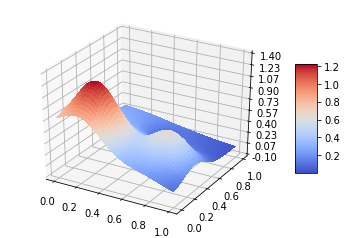

In [13]:
#Henter meshgrid verdier av datasettet 
x_d_OLS, y_d_OLS, z_d_OLS = FindData(X, Y) 
print(x_d_OLS.shape)
# Plotter ekte overflate 
plotSurface(x_d_OLS, y_d_OLS, z_d_OLS) 

In [14]:
#Konverterer meshgrideverdiene til kolonnevektorer
x_OLS,y_OLS,z_OLS,m_OLS = convertData(x_d_OLS, y_d_OLS, z_d_OLS)
print(m_OLS)
print(x_OLS.shape)
# Finner designmatrisen for datasettet 
xyb_Linear = XY(x_OLS,y_OLS) 
# Finner modellen 
betaLinear = beta_model('Linear', xyb_Linear, z_OLS)

40000
(40000, 1)


In [15]:
# regner ut forventet verdi ut ifra datasettet og forventet modell
zpredict_OLS, zpredict_OLS_mesh = predict(xyb_Linear,betaLinear,n)
print(zpredict_OLS_mesh.shape)

(200, 200)


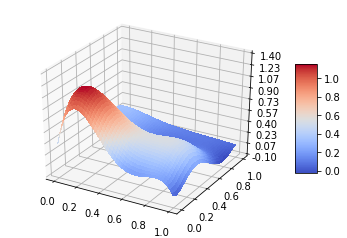

In [16]:
# Plotter forventet overflate  
plotSurface(x_d_OLS, y_d_OLS, zpredict_OLS_mesh)

In [17]:
# Regner ut gjennomsnittsverdien, variansen, mean squared error og standardavviket 
z_mean_OLS = mu(z_OLS,m_OLS)
print(z_mean_OLS)   
var_z_OLS = var(z_OLS,z_mean_OLS,m_OLS)
print(var_z_OLS)        
MSE_OLS = MSE(z_OLS, zpredict_OLS, m_OLS)
print(MSE_OLS)      
R_2_OLS = R_2(z_OLS, zpredict_OLS, z_mean_OLS, m_OLS)
print(R_2_OLS)

0.40884260568740327
[0.08251048]
[3.74528297e-19]
[1.]


#### Tester med nye random punkter: 

In [18]:
xyb_test, number_testpoints, X_new, Y_new, Z_new = testData()
print(number_testpoints)
zpredict_test, zpredict_mesh_test = predict(xyb_test,betaLinear,number_testpoints)
print(zpredict_mesh_test.shape)

200
(200, 200)


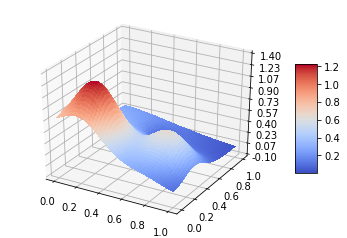

In [19]:
# Plotter ekte overflate med datasettet 
plotSurface( X_new, Y_new, Z_new)

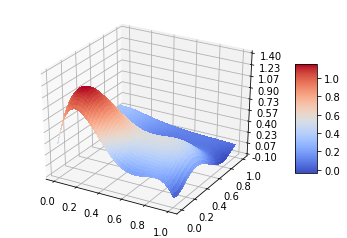

In [20]:
# Plotter beregnet overflate med utregnet modell 
plotSurface( X_new, Y_new, zpredict_mesh_test)

In [21]:
# Regner ut gjennomsnittsverdien, variansen, mean squared error og standardavviket 
z_mean_OLS = mu(z_OLS,m_OLS)
print(z_mean_OLS)   
var_z_OLS = var(z_OLS,z_mean_OLS,m_OLS)
print(var_z_OLS)        
MSE_OLS = MSE(z_OLS, zpredict_OLS, m_OLS)
print(MSE_OLS)      
R_2_OLS = R_2(z_OLS, zpredict_OLS, z_mean_OLS, m_OLS)
print(R_2_OLS)

0.40884260568740327
[0.08251048]
[3.74528297e-19]
[1.]


### Tester med crossvalidation: 

In [22]:
# Cross-Validation med utstrekte kolonnevektorer av datasettet, splitter 3 ganger og bruker OLS 
k_fold(x_OLS,y_OLS,z_OLS, 3, 'Linear')

(26666, 3)
(26667, 3)
(26667, 3)


(0.002035554656143093, 0.9763806240509626)

#### Finn bias og variansen for modellene. 

## Part b) Ridge  
#### Ridge Regression on the Franke function med resampling 

(200, 200)


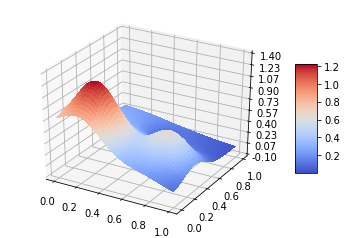

In [23]:
x_d_Ridge, y_d_Ridge, z_d_Ridge = FindData(X , Y) 
print(x_d_Ridge.shape)
plotSurface(x_d_Ridge, y_d_Ridge, z_d_Ridge) 

In [24]:
x_Ridge, y_Ridge, z_Ridge, m = convertData(x_d_Ridge, y_d_Ridge, z_d_Ridge)
print(n)
print(m)

xyb_Ridge = XY(x_Ridge, y_Ridge) 
betaRidge = beta_model('Ridge', xyb_Ridge, z_Ridge)

200
40000


In [25]:
zpredict_Ridge, zpredict_Ridge_mesh = predict(xyb_Ridge ,betaRidge, n)
print(zpredict_Ridge_mesh.shape)

(200, 200)


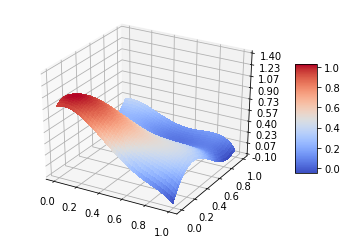

In [26]:
# Plot the predicted surface.
plotSurface(x_d_Ridge, y_d_Ridge, zpredict_Ridge_mesh)

In [27]:
k_fold(x_Ridge, y_Ridge, z_Ridge, 3, 'Ridge')

(26666, 3)
(26667, 3)
(26667, 3)


(0.006036943190544738, 0.9370212285647598)

## Part c) Lasso 

(200, 200)


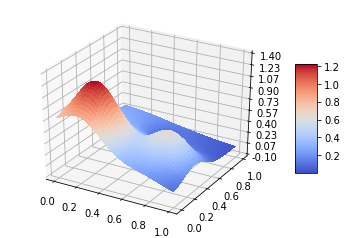

In [28]:
# Oppretter meshgrid av datasettet 
x_d_Lasso, y_d_Lasso, z_d_Lasso = FindData(X , Y) 
print(x_d_Lasso.shape)
# Plotter z_d med meshgrid av x og y
plotSurface(x_d_Lasso, y_d_Lasso, z_d_Lasso) 

In [29]:
# Konverterer meshgrid til kolonnevektorer
x_Lasso, y_Lasso, z_Lasso, m = convertData(x_d_Lasso, y_d_Lasso, z_d_Lasso)
print(n)
print(m)
# Oppretter independent variabel matrise av x og y vektorene
Lasso_multi = np.c_[x_Lasso, y_Lasso]
#print (Lasso_multi)

200
40000


In [30]:
# Bruker sklearn for å finne Lasso-modell. Bruker PolynomialFeatures for ikke lineær funksjon
poly2 = PolynomialFeatures(degree=5)

# Transformerer variabelmatrisen 
Lasso_sklearn = poly2.fit_transform(Lasso_multi)
print(Lasso_sklearn)
#print(z_Lasso)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.005      0.         ... 0.         0.         0.        ]
 [1.         0.01       0.         ... 0.         0.         0.        ]
 ...
 [1.         0.985      0.995      ... 0.95574427 0.96544726 0.97524875]
 [1.         0.99       0.995      ... 0.96547188 0.97034801 0.97524875]
 [1.         0.995      0.995      ... 0.97524875 0.97524875 0.97524875]]


In [31]:
# Beregner Lasso modell 
lasso=linear_model.Lasso(alpha=0.00001)
lasso.fit(Lasso_sklearn, z_Lasso) 

# beregner forventet z-verdier av x og y verdier
predictLasso = lasso.predict(Lasso_sklearn)

print("Lasso Coefficient: ", lasso.coef_)
print("Lasso Intercept: ", lasso.intercept_)

Lasso Coefficient:  [ 0.         -0.49415143  0.75329144 -2.23896678  1.591243   -4.32762574
  1.85393496  1.18247765 -0.84043273  1.37035302  0.59000416 -0.10566102
 -0.6650352  -0.1820793   1.66849205 -0.80986357 -0.71306803  0.69671532
  0.         -0.22549213 -0.07190305]
Lasso Intercept:  [1.04631213]


C:\Users\monah\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


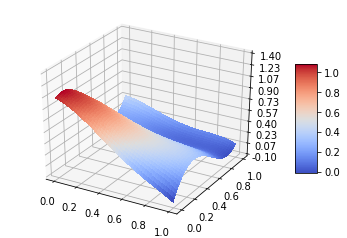

In [32]:
# Plotter forventet overflate med Lasso modellen 
predict_mesh_Lasso = predictLasso.reshape(n,n)
plotSurface(x_d_Lasso, y_d_Lasso, predict_mesh_Lasso)

Kommentar til Lasso: 
Ser at ved å endre på alpha til veldig liten så begynner Lasso og ligne mer og mer på originale surfacen. 
ved alpha = 0.1 så synes bare et grått plan. 
Koeffisientene endres også ved å endre på alpha. Det samme med intercept. 

In [33]:
#k_fold(x_Lasso, y_Lasso, z_Lasso, 3, 'Lasso') 

## Part d) 

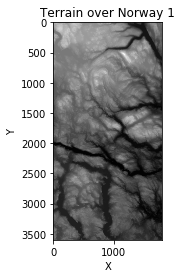

In [34]:
from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('Data/SRTM_data_Norway_1.tif')
#terrain1 = imread('Data/SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

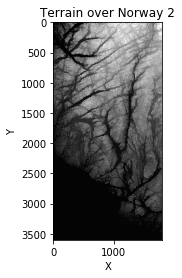

In [35]:
# Load the terrain
terrain2 = imread('Data/SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 2')
plt.imshow(terrain2, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Part e) 